## About Dataset
The Google Stock Market Dataset is a comprehensive collection of historical stock market data specifically focused on Google's stock (ticker symbol: GOOGL). This dataset provides valuable information for analyzing and understanding the price range of Google's stock over time.
The dataset includes essential columns: "Price High" and "Price Low." The "Price High" column represents the highest recorded price for Google's stock on a given trading day. This value reflects the peak price reached during the trading session and provides insights into the stock's potential value and market sentiment.
Conversely, the "Price Low" column indicates the lowest recorded price for Google's stock on a specific trading day. This value signifies the minimum price reached during the trading session, revealing the stock's potential support level or market pressure.
With this dataset, researchers, analysts, and investors can track the historical fluctuations in Google's stock price and gain insights into its volatility, trend patterns, and potential trading strategies. It serves as a valuable resource for conducting in-depth technical analysis, developing predictive models, and making informed investment decisions related to Google's stock.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("GOOGLE.csv")

In [3]:
# we have data 2004 to 2023
data.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


In [4]:
data.tail()

,Date,Open,High,Low,Close,Volume
4712,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100
4713,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400
4714,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000
4715,2023-05-12,116.680000,118.029999,116.110001,117.510002,41073800
4716,2023-05-15,116.110001,118.480003,116.010002,116.510002,36226100


In [5]:
data.shape

(4717, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4717 non-null   object 
 1   Open    4717 non-null   float64
 2   High    4717 non-null   float64
 3   Low     4717 non-null   float64
 4   Close   4717 non-null   float64
 5   Volume  4717 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 221.2+ KB


In [7]:
# check null value
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
# check duplicet value
data.duplicated().sum()

0

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.

In [9]:
# get important columns from data to build the model 
google_stocks = data[["Date","Close"]]

In [10]:
google_stocks = google_stocks.head(1000)

In [11]:
# after getting data convert date column in date time
google_stocks["Date"] = pd.to_datetime(google_stocks["Date"])

# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [12]:
# set data Column as index
google_stocks = google_stocks.set_index("Date")

In [13]:
# get statistical summery
google_stocks.describe()

,Close
count,1000.000000
mean,10.078816
std,3.638416
min,2.502753
25%,7.408158
50%,10.512763
75%,12.493306
max,18.563313


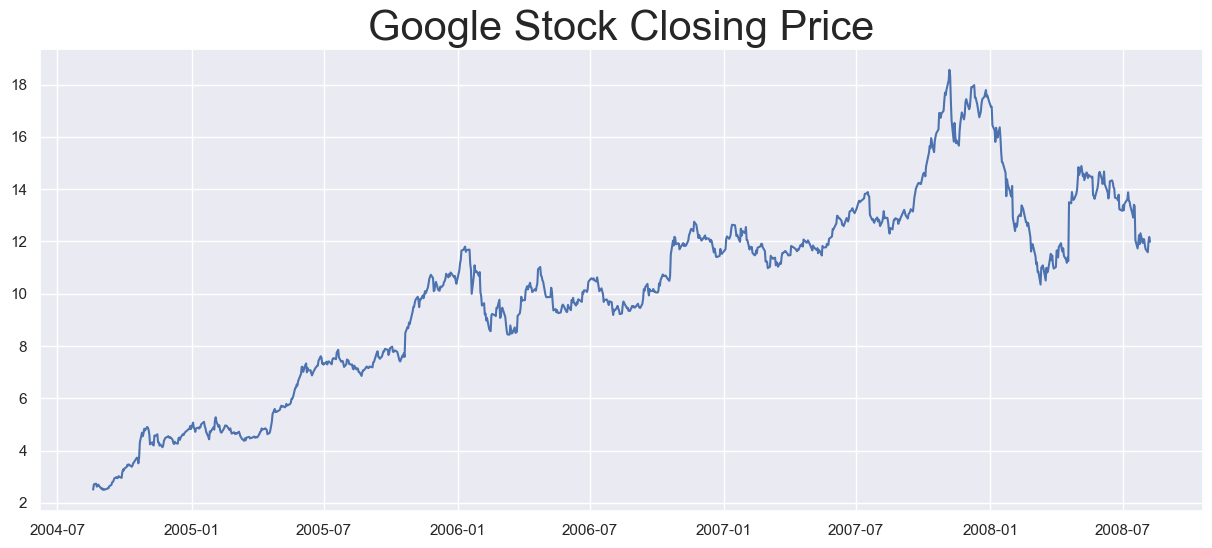

In [14]:
# now we have to do EDA to understand the data
plt.title("Google Stock Closing Price",fontsize=30)
plt.plot(google_stocks)

<Axes: title={'center': 'Google Stock Distridution Of Data'}, ylabel='Density'>

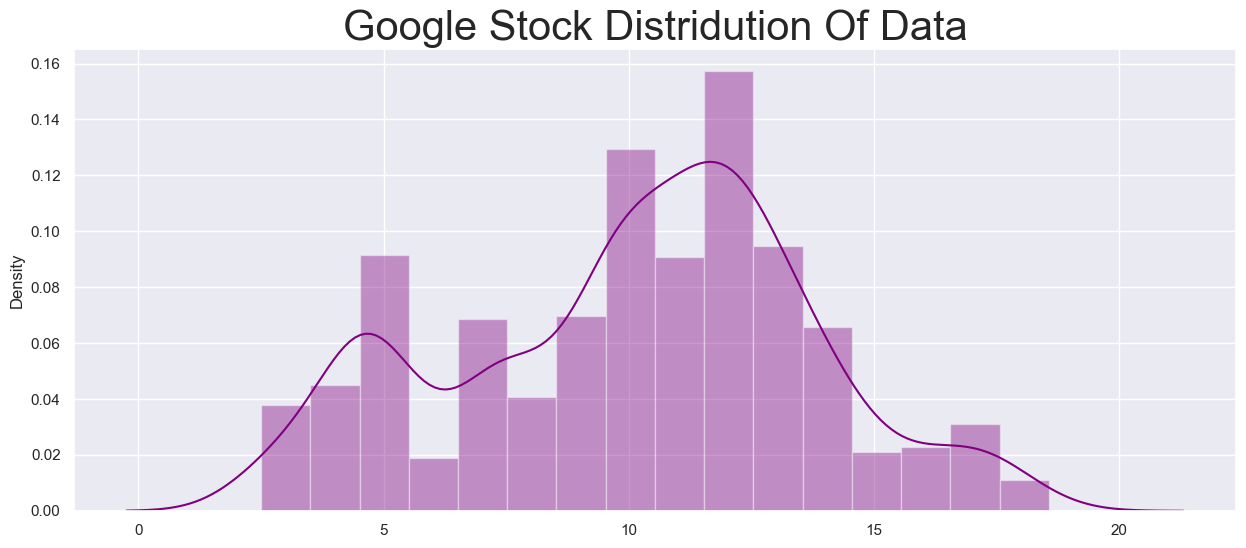

In [15]:
# Check Distribution Of Data 
plt.title("Google Stock Distridution Of Data",fontsize=30)
sns.distplot(google_stocks,color="purple")

As We See There Are Outlayer In The Data WE Have To RemoveThat Now


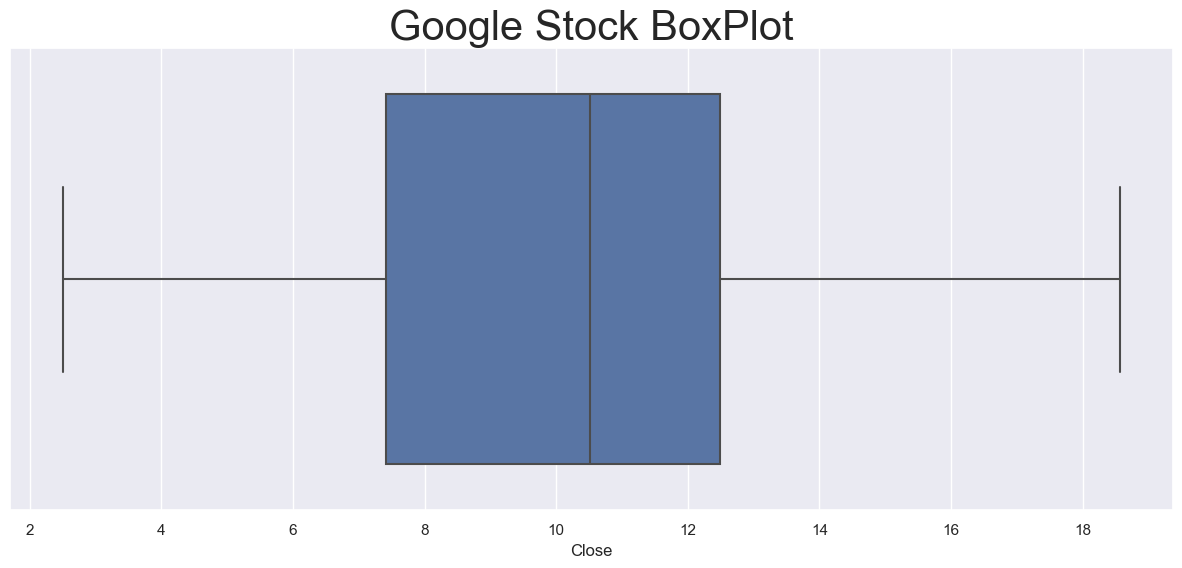

In [16]:
# checking Outlayer with Box Plot
plt.title("Google Stock BoxPlot",fontsize=30)
sns.boxplot(google_stocks["Close"])
print("As We See There Are Outlayer In The Data WE Have To RemoveThat Now")

In [17]:
# calculate moving avarage
moving_mean = google_stocks["Close"].rolling(55).mean()
print(moving_mean)

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
                ...    
2008-08-01    13.481795
2008-08-04    13.428105
2008-08-05    13.382505
2008-08-06    13.341018
2008-08-07    13.295755
Name: Close, Length: 1000, dtype: float64


In [18]:
# calculate moving std
moving_std = google_stocks["Close"].rolling(55).std()
print(moving_mean)

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
                ...    
2008-08-01    13.481795
2008-08-04    13.428105
2008-08-05    13.382505
2008-08-06    13.341018
2008-08-07    13.295755
Name: Close, Length: 1000, dtype: float64


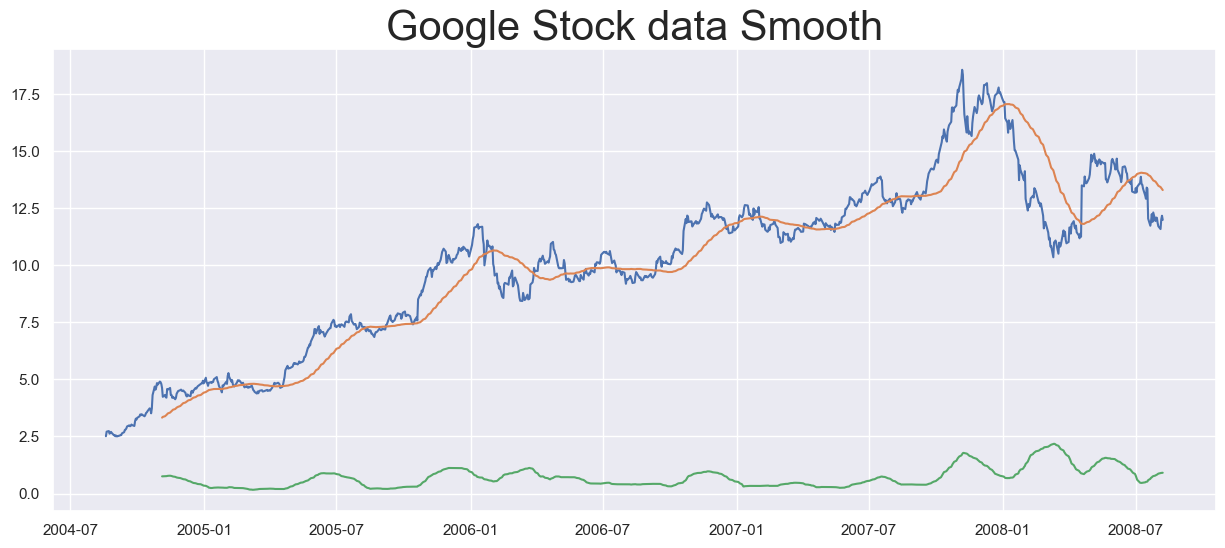

In [19]:
# now plot and check Smoothness of data
plt.title("Google Stock data Smooth",fontsize=30)
plt.plot(google_stocks["Close"])
plt.plot(moving_mean)
plt.plot(moving_std)

In [20]:
# testing the data is stationary or non stationary
from statsmodels.tsa.stattools import adfuller
adf = adfuller(google_stocks["Close"])
adf

(-2.0160519704587196,
 0.27957952200455705,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -86.74570148912585)

In [21]:
pd.Series(adf[:4],index=["test stats","p-value","lag","data point"])

test stats     -2.016052
p-value         0.279580
lag             0.000000
data point    999.000000
dtype: float64

In [22]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(55).mean() # rolling mean
    rolstd = timeseries.rolling(55).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

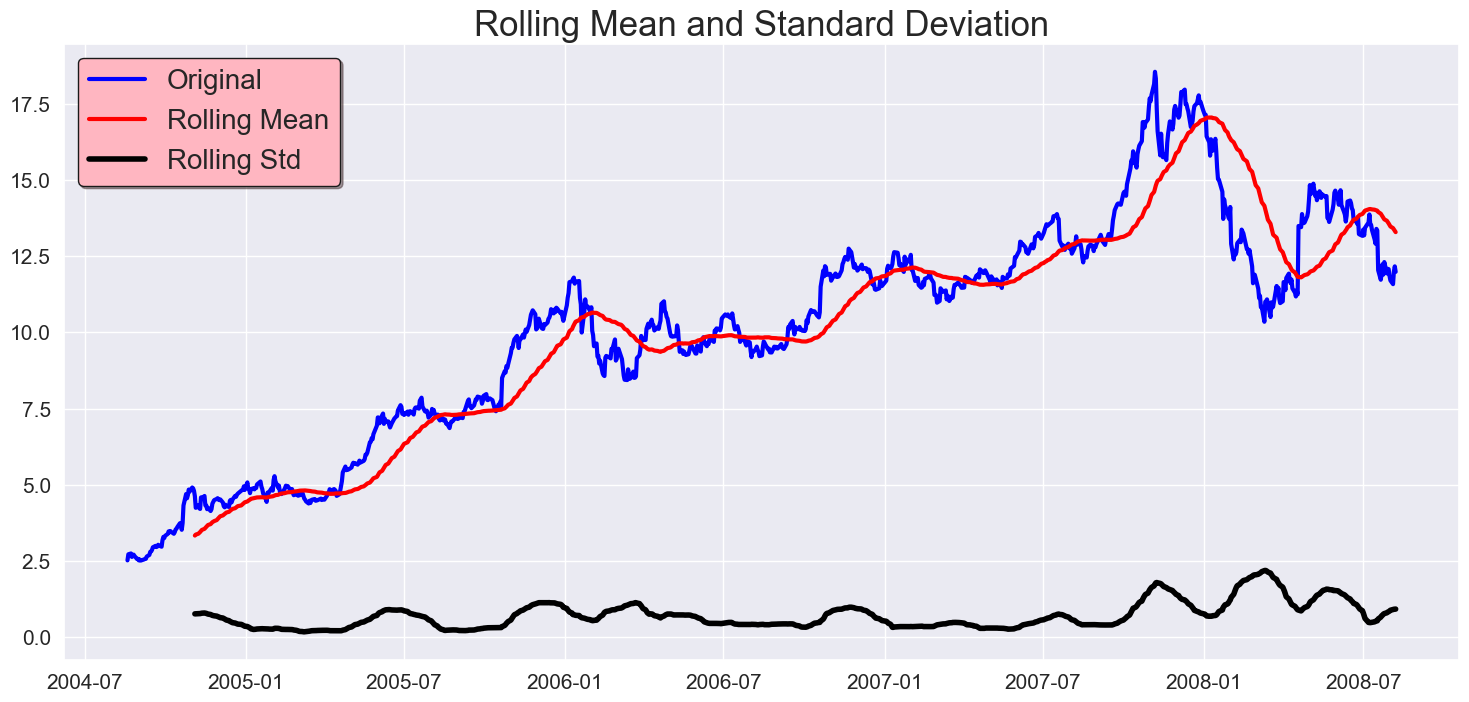

Results of dickey fuller test
Test Statistics                 -2.016052
p-value                          0.279580
No. of lags used                 0.000000
Number of observations used    999.000000
critical value (1%)             -3.436913
critical value (5%)             -2.864437
critical value (10%)            -2.568313
dtype: float64


In [23]:
test_stationarity(google_stocks.Close)

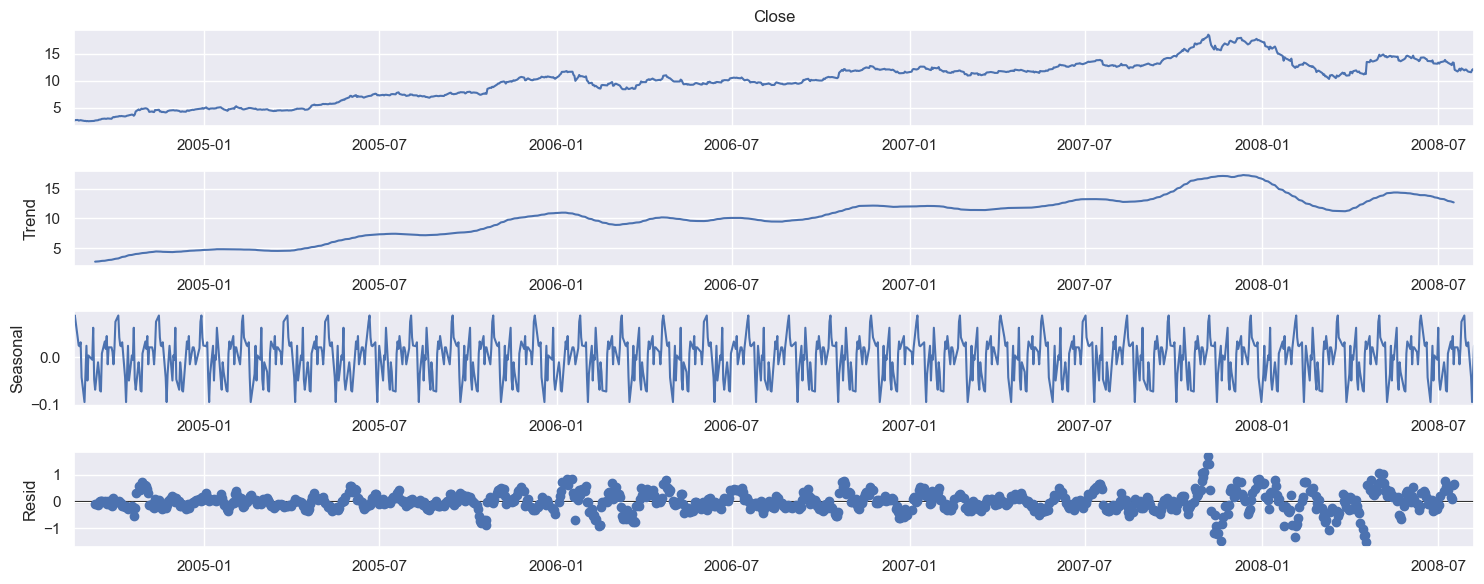

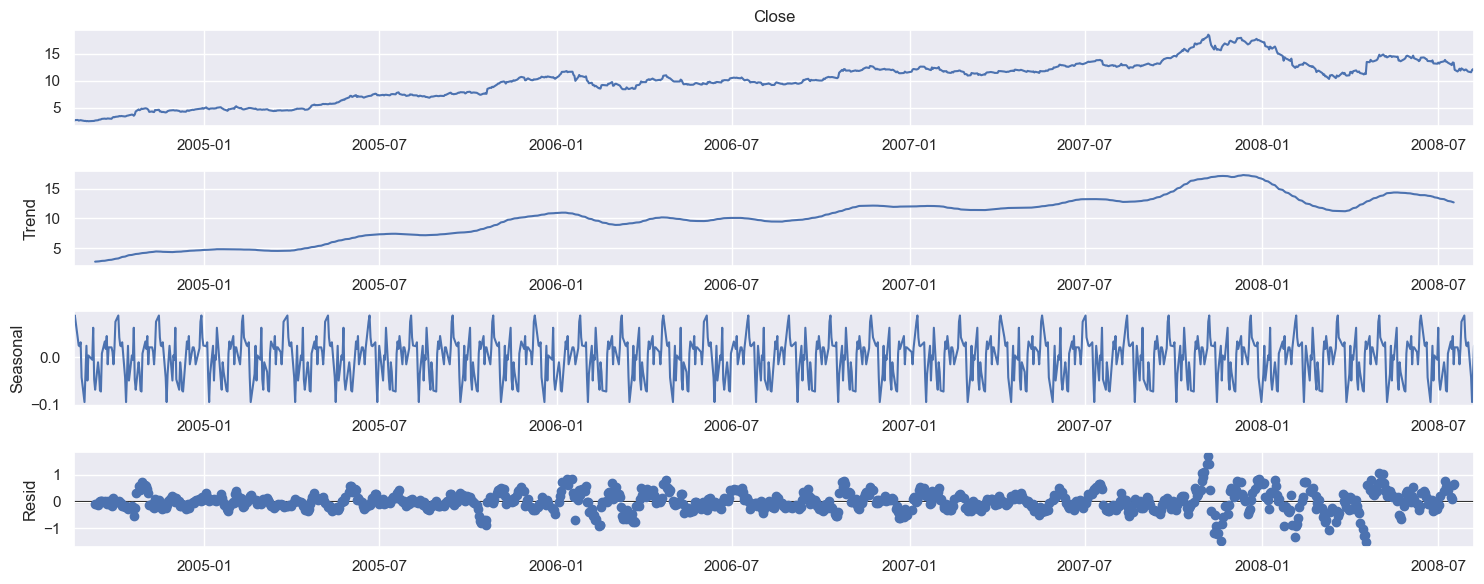

In [24]:
# See Components of data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(google_stocks["Close"],period=30)
result.plot()

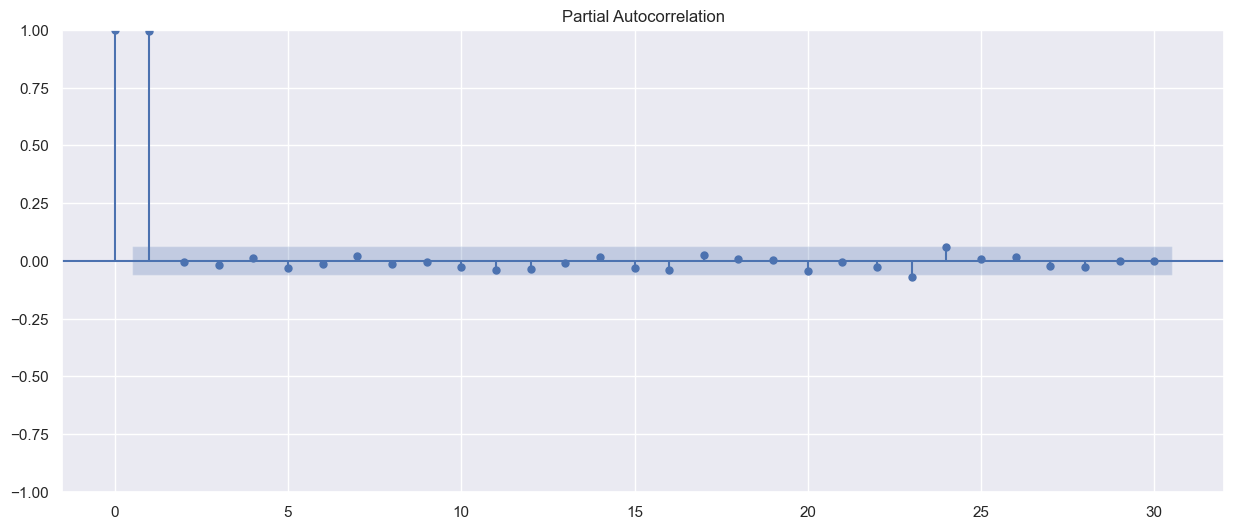

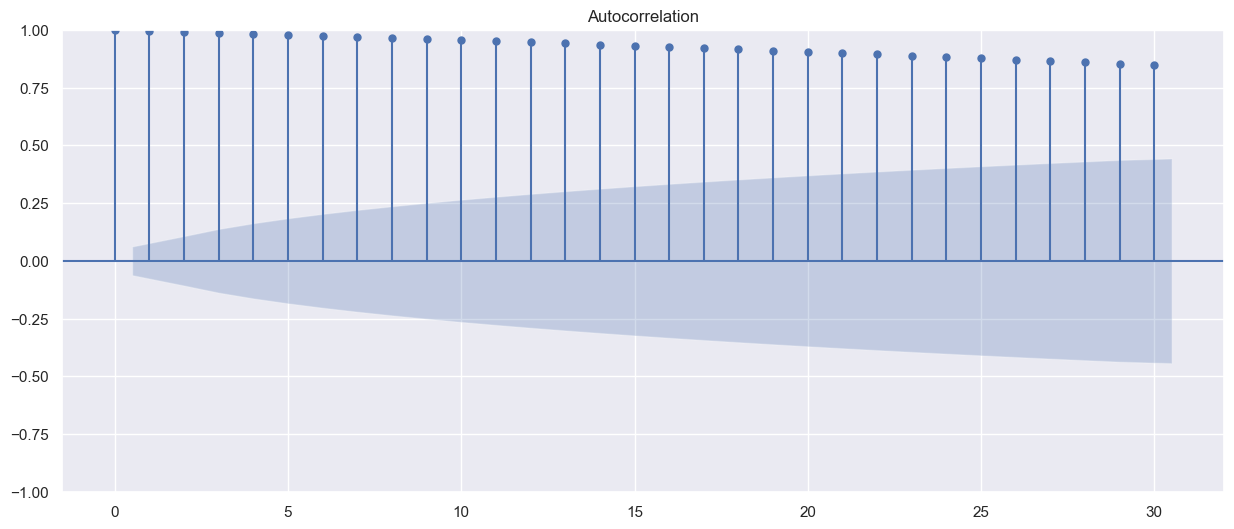

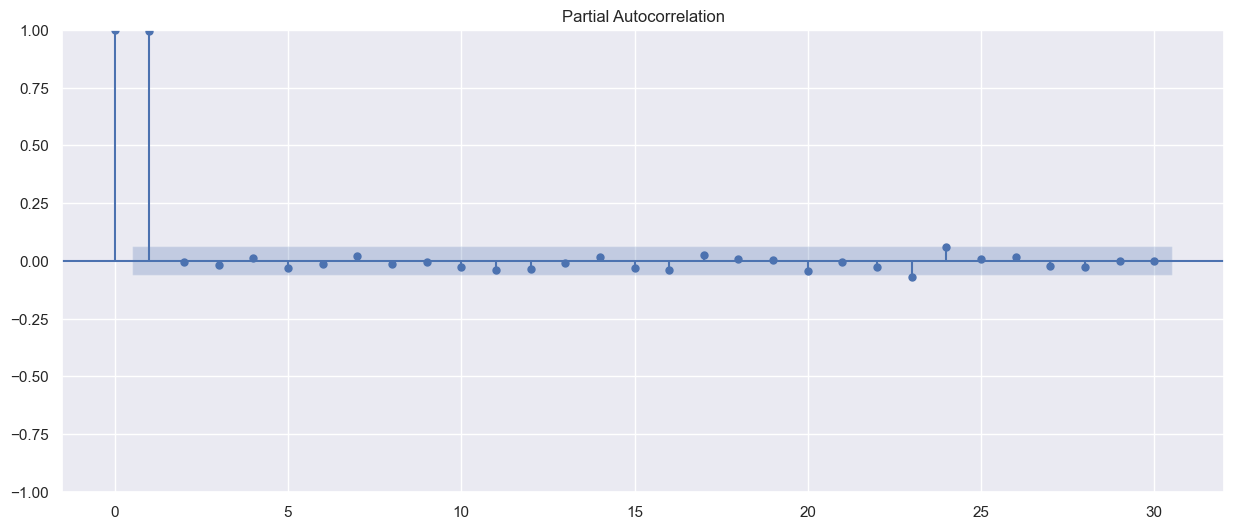

In [25]:
# plot he graph of ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(google_stocks["Close"])
plot_pacf(google_stocks["Close"])

In [26]:
# # create function to remove outlayers 
# def remove_outlayers(df,threshold=1.5):
#     q1 = df.quantile(0.25)
#     q3 = df.quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - threshold * iqr
#     upper_bound = q3 + threshold * iqr
#     cleaned_data = df[(df >= lower_bound) & (df <= upper_bound)]
#     return cleaned_data
# google_stocks["Close"] = remove_outlayers(google_stocks["Close"])
# google_stocks.dropna(inplace=True)

In [27]:
# google_stocks.shape

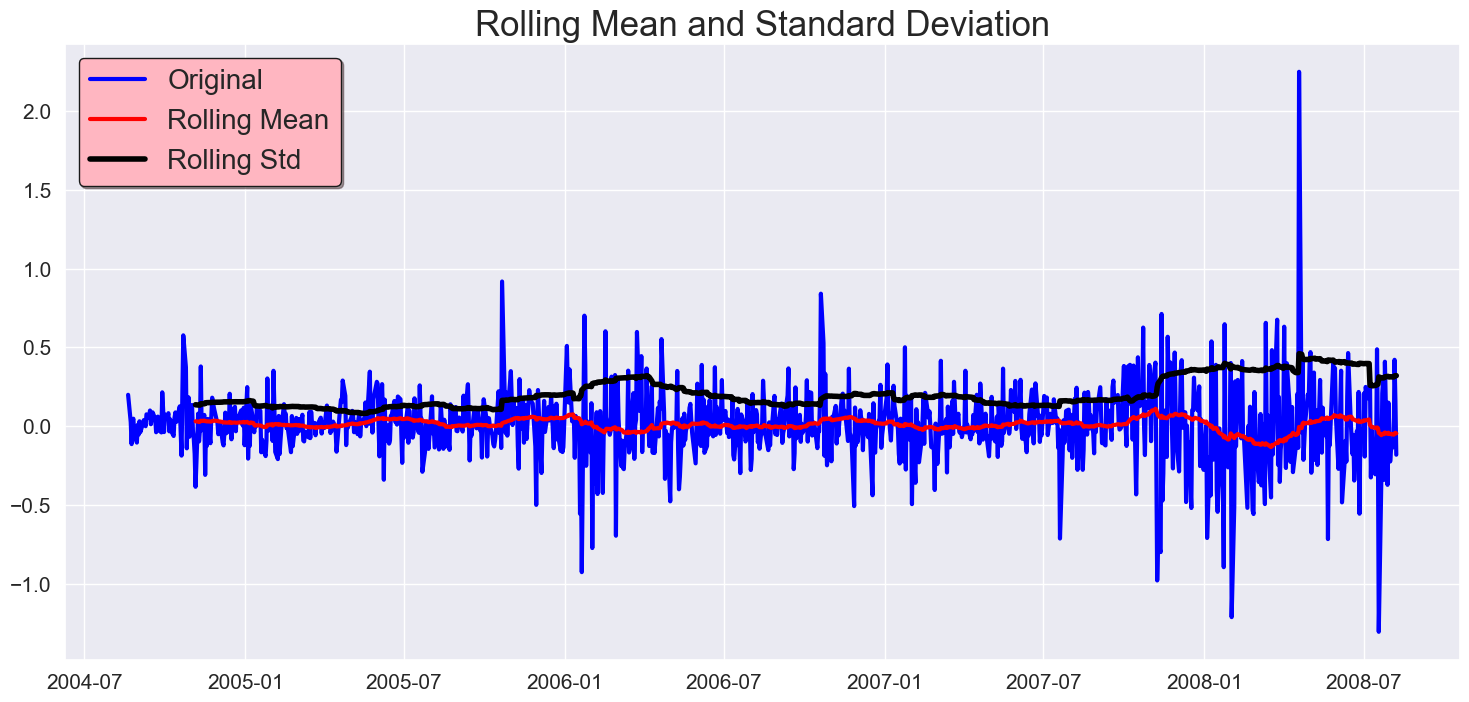

Results of dickey fuller test
Test Statistics                -30.880442
p-value                          0.000000
No. of lags used                 0.000000
Number of observations used    998.000000
critical value (1%)             -3.436919
critical value (5%)             -2.864440
critical value (10%)            -2.568314
dtype: float64


In [28]:
# convert data into the stationary time series
# method1
test_stationarity(google_stocks["Close"].diff().dropna())

In [29]:
df_close = google_stocks["Close"]

In [30]:
df_close

Date
2004-08-19     2.511011
2004-08-20     2.710460
2004-08-23     2.737738
2004-08-24     2.624374
2004-08-25     2.652653
                ...    
2008-08-01    11.708208
2008-08-04    11.586587
2008-08-05    12.008258
2008-08-06    12.170671
2008-08-07    11.989990
Name: Close, Length: 1000, dtype: float64

In [31]:
train_data = df_close[:-60]
test_data = df_close[-60:]

In [32]:
print(train_data.shape)
print(test_data.shape)

(940,)
(60,)


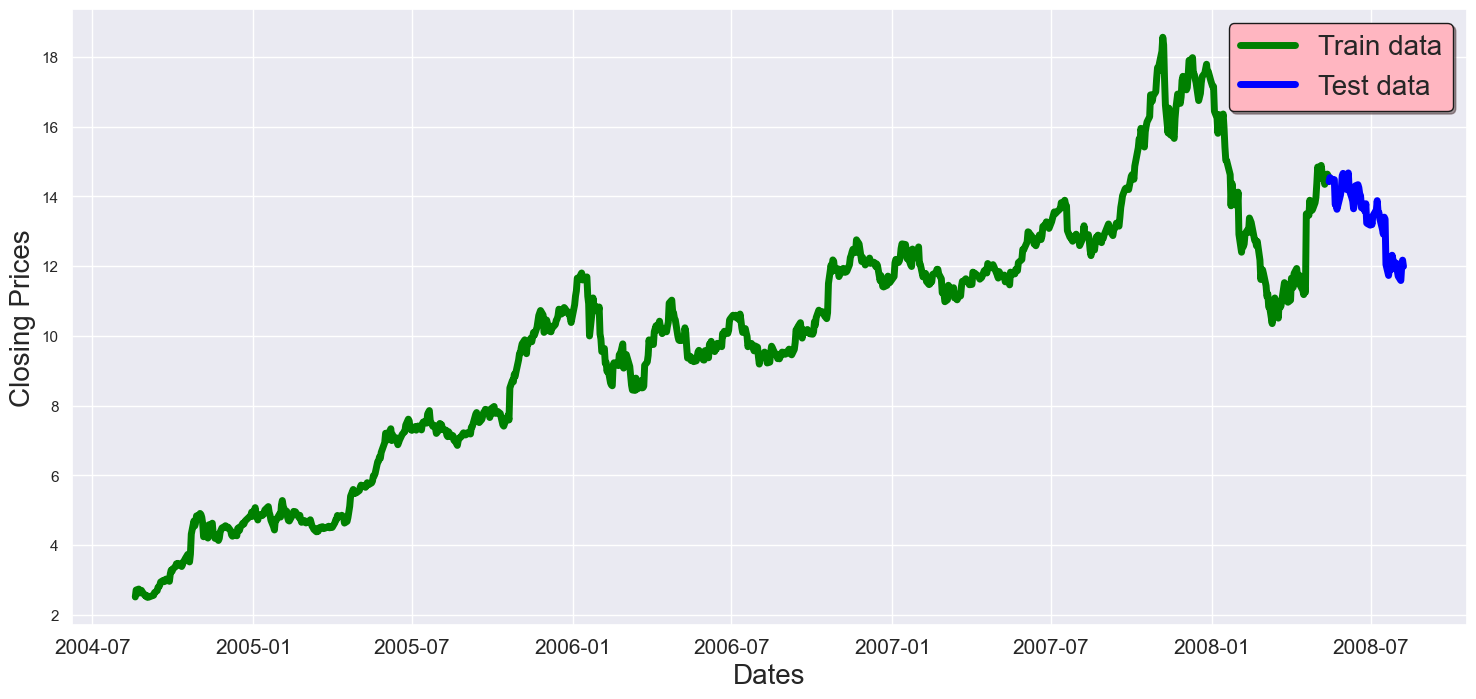

In [33]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
history  = [x for x in df_close]

In [37]:
# Creat the function to train model
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [38]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [39]:
# # evaluate parameters
# p_values = range(0, 3)
# d_values = range(0, 3)
# q_values = range(0, 3)
# evaluate_models(train_data, test_data, p_values, d_values, q_values)

In [40]:
#ARIMA(0, 0, 2) RMSE=25.344

In [41]:
history  = [x for x in train_data]
predictions = []
for i in range(len(test_data)):
    model = ARIMA(history,order=(1, 0, 1))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[i])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 0.30814746845866076


In [42]:
# # Reduce the size of the training data if needed
# train_subset = train_data[-1000:]  # Adjust the subset size as per your requirements

# # Convert train_subset to a list for faster processing
# history = train_subset.tolist()

# predictions = [None] * len(test_data)

# # Batch processing size
# batch_size = 100  # Adjust the batch size as per your requirements

# # Iterate over test_data in batches
# for i in range(0, len(test_data), batch_size):
#     batch_end = min(i + batch_size, len(test_data))
#     batch = test_data[i:batch_end]

#     # Create ARIMA model and fit
#     model = ARIMA(history, order=(1, 1, 2))
#     model_fit = model.fit()

#     # Make predictions for the batch
#     fc = model_fit.forecast(steps=len(batch), alpha=0.05)

#     # Update predictions list
#     predictions[i:batch_end] = fc

#     # Update history with the current batch
#     history.extend(batch)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(test_data, predictions))
# print("RMSE of ARIMA Model:", rmse)

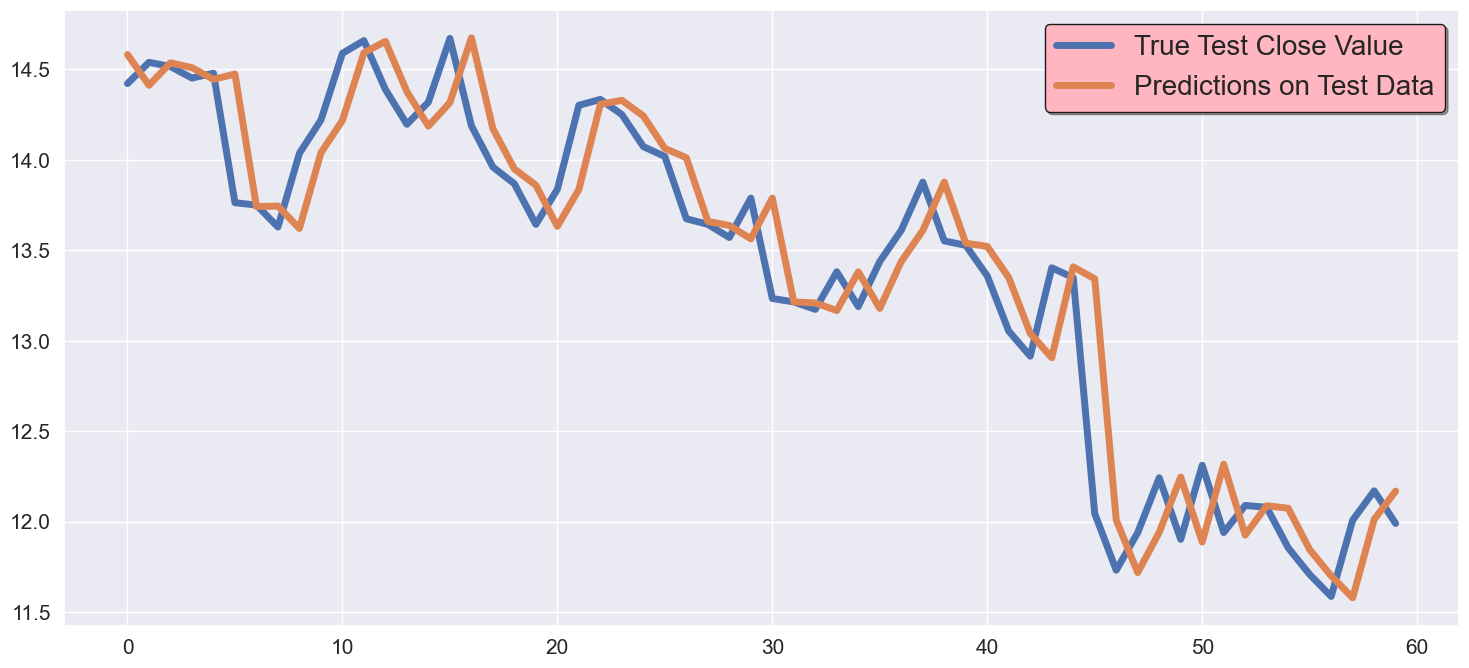

In [43]:
plt.figure(figsize=(18, 8))
plt.grid(True)

# Plot true test close values
plt.plot(range(len(test_data)), test_data, label='True Test Close Value', linewidth=5)

# Plot predictions on test data
plt.plot(range(len(predictions)), predictions, label='Predictions on Test Data', linewidth=5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

plt.show()

In [45]:
model_fit.predict(start=1,end=len(df_close)+365)

array([ 2.51906845,  2.72303702,  2.74618792, ..., 10.68154366,
       10.67842163, 10.675304  ])